In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
import tensorflow as tf
from PIL import Image
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model

In [4]:
!mkdir -p ./kaggle

The syntax of the command is incorrect.


In [5]:
import os
os.makedirs('./kaggle', exist_ok=True)

In [8]:
 kaggle.json /content/drive/MyDrive/Colab\ Notebooks/Emotion-Detection/

SyntaxError: unexpected character after line continuation character (3644831153.py, line 1)

In [9]:
kaggle_json_path = r"/content/drive/MyDrive/Colab Notebooks/Emotion-Detection/kaggle.json"


In [10]:
kaggle datasets download -d msambare/fer2013

SyntaxError: invalid syntax (3823403127.py, line 1)

In [12]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip /content/fer2013.zip -d /content/drive/MyDrive/Colab\ Notebooks/Emotion-Detection

unzip:  cannot find either /content/fer2013.zip or /content/fer2013.zip.zip.


In [14]:
!ls /content


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
import os
print(os.listdir('/content'))


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content'

In [16]:
!unzip /content/fer2013.zip -d /content/fer2013

unzip:  cannot find either /content/fer2013.zip or /content/fer2013.zip.zip.


In [17]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'fer2013.zip', 'kaggle', 'Untitled.ipynb']


In [18]:
!unzip fer2013.zip -d /path/to/extract/folder

Archive:  fer2013.zip


checkdir:  cannot create extraction directory: /path/to/extract/folder


In [24]:
# # Define your project name
project_name = 'FER_2013_Emotion_Detection'


In [23]:
# # List your models
model_names = [
     'Custom_CNN_From_Scratch',
     'Custom_CNN_With_Augmentation',
     'VGG16_Transfer_Learning',
     'ResNet50_Transfer_Learning'
 ]

In [25]:
def count_files_in_subdirs(directory, set_name):

SyntaxError: incomplete input (2550807339.py, line 1)

In [26]:
def count_files_in_subdirs(directory, set_name):
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

In [27]:
# Paths to the training and testing directories.
train_dir = '/kaggle/input/fer2013/train'
test_dir = '/kaggle/input/fer2013/test'

In [28]:
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/fer2013/train'

In [29]:
import os
print(os.listdir())  # List files in the current directory


['.ipynb_checkpoints', 'fer2013', 'fer2013.zip', 'kaggle', 'Untitled.ipynb']


In [30]:
train_dir = r'C:\path\to\your\extracted\fer2013\train'  # Adjust this path as needed


In [31]:
print(os.listdir('./fer2013'))


['test', 'train']


In [46]:
import os

def count_files_in_subdirs(directory, set_name):
    counts = {}
    
    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)
        
        # Check if the item is a directory (i.e., a class folder).
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory.
            counts[item] = len(os.listdir(item_path))
    
    print(f"File counts for {set_name}:")
    return counts


In [44]:
train_dir = './fer2013/train'  # Adjust with your actual path
test_dir = './fer2013/test'  # Adjust with your actual path



In [45]:
# Count the files in the subdirectories of the training directory and print the result.
train_count = count_files_in_subdirs(train_dir, 'train')
print(train_count)

# Count the files in the subdirectories of the testing directory and print the result.
test_count = count_files_in_subdirs(test_dir, 'test')
print(test_count)


File counts for train:
{'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
File counts for test:
{'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


In [48]:
train_count_df = pd.DataFrame(list(train_count.items()), columns=['Emotion', 'Count'])


<Axes: xlabel='Emotion'>

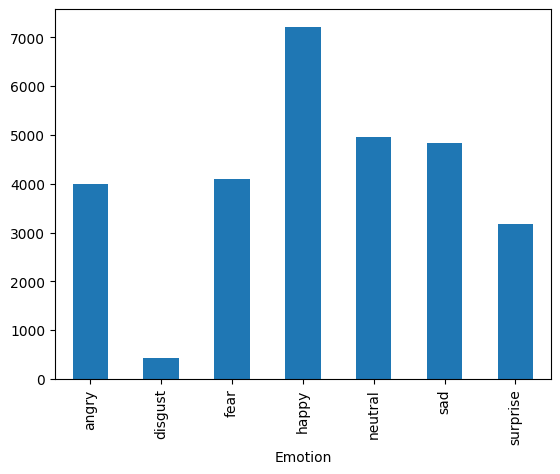

In [49]:
train_count_df.plot(kind='bar', x='Emotion', y='Count', legend=False)


In [50]:
test_count_df = pd.DataFrame(list(test_count.items()), columns=['Emotion', 'Count'])


<Axes: xlabel='Emotion'>

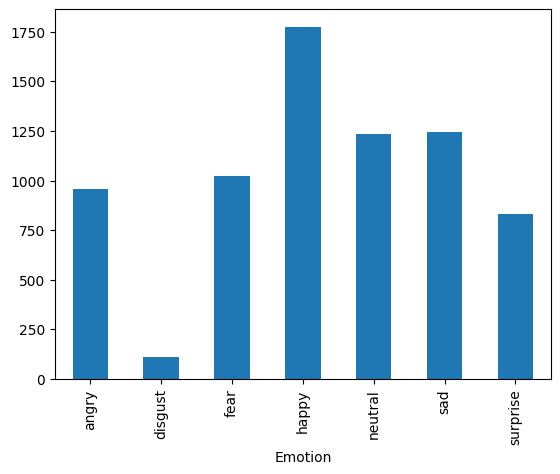

In [51]:
test_count_df.plot(kind='bar', x='Emotion', y='Count', legend=False)

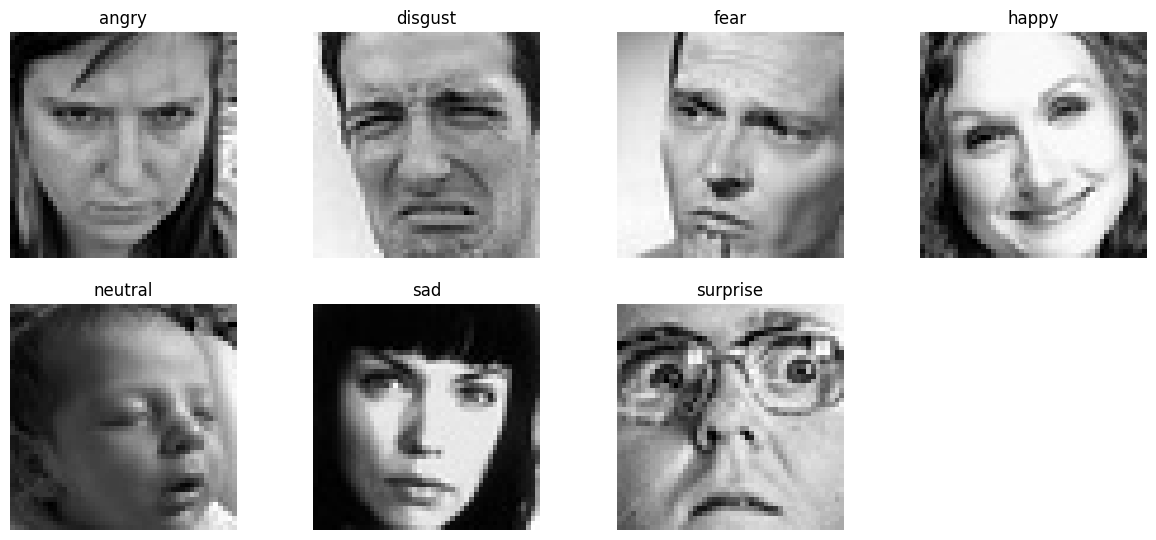

In [52]:
emotions = os.listdir(train_dir)
plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions, 1):
    folder = os.path.join(train_dir, emotion)
    img_path = os.path.join(folder, os.listdir(folder)[12])
    img = plt.imread(img_path)
    plt.subplot(3, 4, i)
    plt.grid()
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [53]:
def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        # image = Image.open(image_path)
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_name}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

In [55]:
angry_directory_path = './fer2013/train/angry'


In [58]:
import os
print(os.path.exists('./fer2013/train/angry'))  # Check if the path exists


True


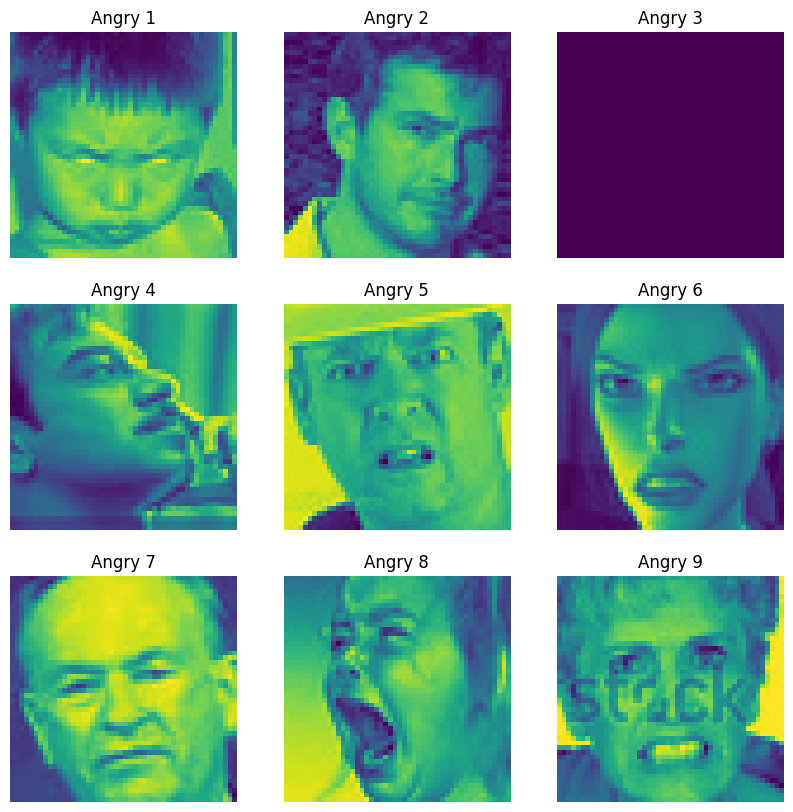

In [59]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)
    
    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        num_images = len(image_filenames)

    # Create subplots
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        image_path = os.path.join(directory_path, image_filenames[i])
        img = mpimg.imread(image_path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{class_name} {i+1}')
    
    plt.show()

# Correct path for local environment
angry_directory_path = './fer2013/train/angry'  # Adjust this path if needed
plot_images_from_directory(angry_directory_path, class_name='Angry')


In [60]:
disgust_directory_path = './fer2013/train/disgust'  # Replace with the correct path


In [61]:

print(os.path.exists('./fer2013/train/disgust'))  # Check if the path exists


True


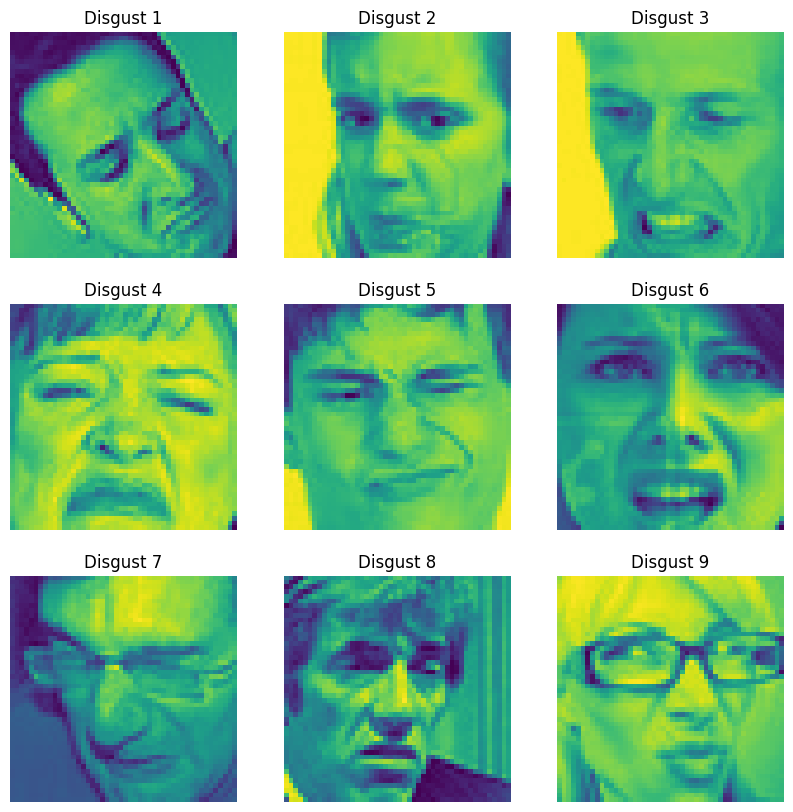

In [62]:


def plot_images_from_directory(directory_path, class_name, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)
    
    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        num_images = len(image_filenames)

    # Create subplots
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        image_path = os.path.join(directory_path, image_filenames[i])
        img = mpimg.imread(image_path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{class_name} {i+1}')
    
    plt.show()

# Correct path for local environment
disgust_directory_path = './fer2013/train/disgust'  # Replace with the actual path on your machine
plot_images_from_directory(disgust_directory_path, class_name='Disgust')


In [63]:
surprise_directory_path = './fer2013/train/happy'  # Adjust this path if needed


In [64]:

print(os.path.exists('./fer2013/train/happy'))  # Should return True if the path is correct


True


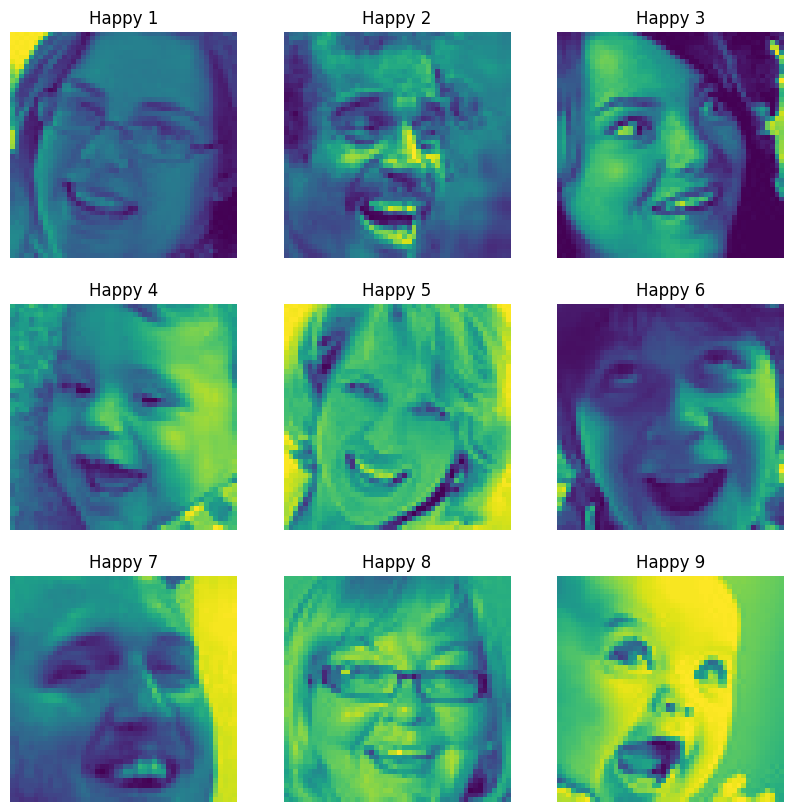

In [65]:
plot_images_from_directory(surprise_directory_path, class_name='Happy')


In [66]:
import cv2

image_path = '/kaggle/input/fer2013/train/angry/Training_10120469.jpg'

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# If the image is loaded successfully, print its pixel values
if img is not None:
    # print(img)
    print("Shape:", img.shape)  # This should now print (48, 48)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

The image could not be loaded. Please check the path and file permissions.


In [67]:
image_filenames = [f for f in os.listdir('./fer2013/train/happy') if f.endswith(('.jpg', '.png'))]
print(image_filenames)


['Training_10019449.jpg', 'Training_10046809.jpg', 'Training_10066226.jpg', 'Training_10070997.jpg', 'Training_10080933.jpg', 'Training_10109375.jpg', 'Training_10116721.jpg', 'Training_10127474.jpg', 'Training_10133389.jpg', 'Training_10139297.jpg', 'Training_10142161.jpg', 'Training_10142426.jpg', 'Training_10181727.jpg', 'Training_1018317.jpg', 'Training_10199847.jpg', 'Training_10209551.jpg', 'Training_10220224.jpg', 'Training_10229138.jpg', 'Training_10230185.jpg', 'Training_10239785.jpg', 'Training_10240470.jpg', 'Training_10242543.jpg', 'Training_10246389.jpg', 'Training_10248095.jpg', 'Training_10257744.jpg', 'Training_10265501.jpg', 'Training_1027250.jpg', 'Training_10288829.jpg', 'Training_10290756.jpg', 'Training_10313464.jpg', 'Training_10348116.jpg', 'Training_10361011.jpg', 'Training_10367793.jpg', 'Training_10391066.jpg', 'Training_1041361.jpg', 'Training_10422282.jpg', 'Training_10425802.jpg', 'Training_10435640.jpg', 'Training_10437958.jpg', 'Training_10441891.jpg', 'T

In [69]:
image_path = './fer2013/train/angry/Training_10120469.jpg'  # Adjust path as necessary


In [70]:

print("File exists:", os.path.exists(image_path))  # Should return True if the file is accessible


File exists: True


In [71]:
from PIL import Image

try:
    img = Image.open(image_path)
    img_gray = img.convert("L")  # Convert to grayscale
    print("Image loaded successfully. Shape:", img_gray.size)
except Exception as e:
    print("Error loading image:", e)


Image loaded successfully. Shape: (48, 48)


In [72]:
# Define paths to the train and validation directories
train_data_dir = '/kaggle/input/fer2013/train'
test_data_dir = '/kaggle/input/fer2013/test'

In [73]:
img_width, img_height = 48, 38
batch_size = 64
epochs = 10
num_classes = 7

In [74]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # Set this to enable `subset`
)


In [77]:
train_data_dir = './fer2013/train'
test_data_dir = './fer2013/test'
img_width, img_height = 48, 48
batch_size = 32  # Adjust as needed


In [78]:
train_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'  # Use training subset
)

validation_generator = data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'  # Use validation subset
)

test_generator = data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
    # No subset here, as this is the test set
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [79]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

# Accessing class labels for the validation data
test_class_labels = test_generator.class_indices
print("Validation class labels:", test_class_labels)

Training class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [80]:
# Initialising the CNN
model = Sequential()

# Adding convolutional layers with activations on the same line for clarity
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer="glorot_uniform", padding='same', input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and adding dense layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [81]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 22, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11, 11, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 512)           │              

 Total params: 17,046,535 (65.03 MB)

 Trainable params: 17,044,871 (65.02 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [83]:
# Callback for early stopping
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

In [84]:
# Aggregating all callbacks into a list
callbacks = [earlystop]

In [85]:
train_generator.samples

22968

In [86]:
train_steps_per_epoch = train_generator.samples // train_generator.batch_size + 1
validation_steps_epoch = validation_generator.samples // validation_generator.batch_size + 1
test_steps_epoch = test_generator.samples // test_generator.batch_size + 1

In [88]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 1226s 2s/step - accuracy: 0.3180 - loss: 10.5904 - val_accuracy: 0.3964 - val_loss: 8.3238
Epoch 2/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 1321s 2s/step - accuracy: 0.3846 - loss: 7.5783 - val_accuracy: 0.4400 - val_loss: 5.6617
Epoch 3/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 1125s 2s/step - accuracy: 0.4335 - loss: 5.2009 - val_accuracy: 0.4003 - val_loss: 4.0712
Epoch 4/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 1000s 1s/step - accuracy: 0.4711 - loss: 3.6107 - val_accuracy: 0.5091 - val_loss: 2.8009
Epoch 5/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 991s 1s/step - accuracy: 0.4974 - loss: 2.6465 - val_accuracy: 0.5065 - val_loss: 2.2698
Restoring model weights from the end of the best epoch: 5.


In [89]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

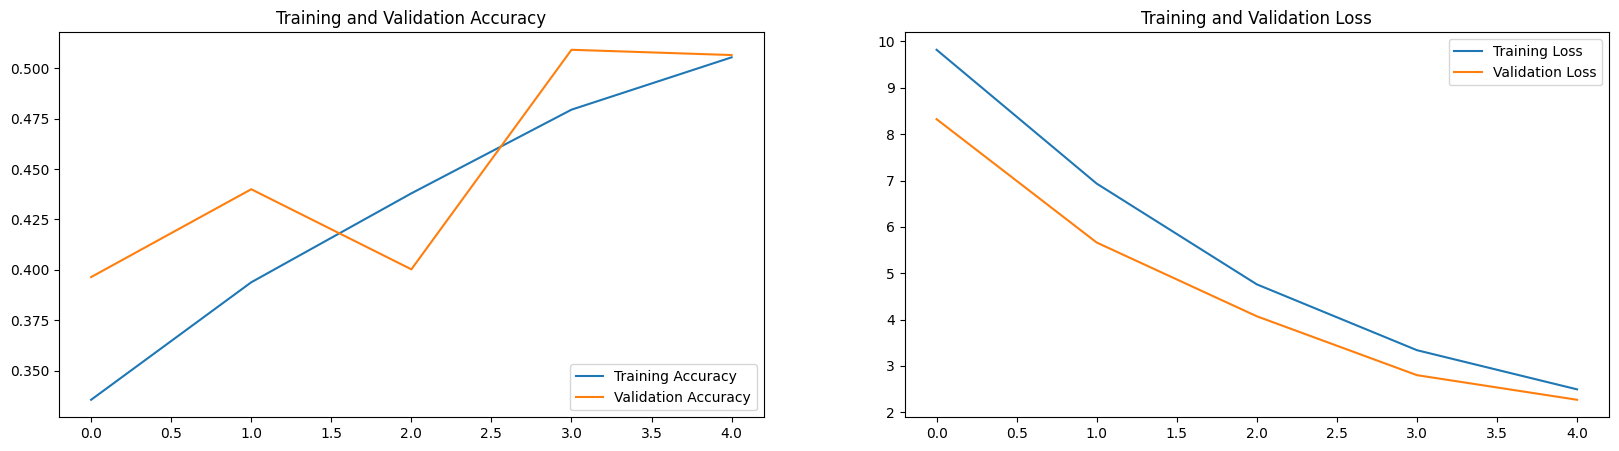

In [90]:
plot_training_history(history)

In [91]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

718/718 ━━━━━━━━━━━━━━━━━━━━ 199s 278ms/step - accuracy: 0.5424 - loss: 2.1804
225/225 ━━━━━━━━━━━━━━━━━━━━ 103s 459ms/step - accuracy: 0.5179 - loss: 2.2656
final train accuracy = 53.94 , validation accuracy = 51.18


In [92]:
import numpy as np

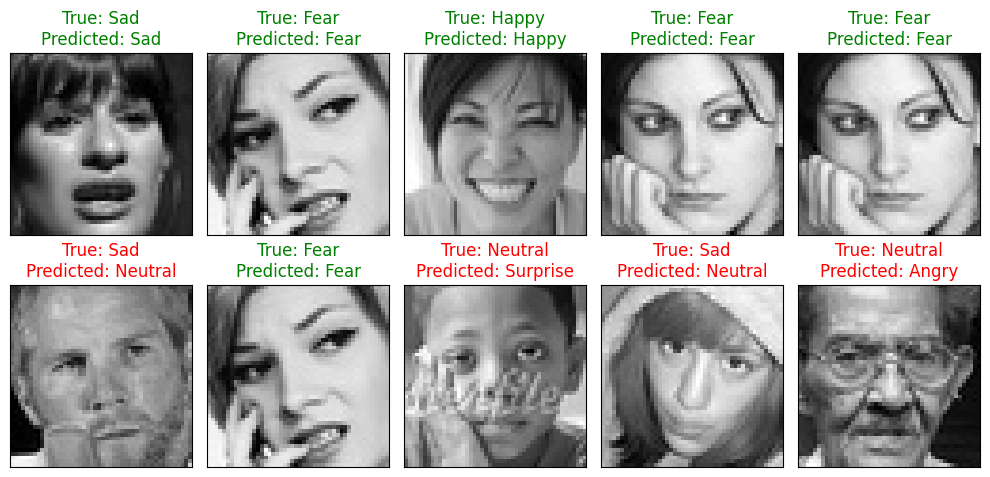

In [93]:
# Emotion classes for the dataset
Emotion_Classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Assuming test_generator and model are already defined
batch_size = test_generator.batch_size

# Selecting a random batch from the test generator
Random_batch = np.random.randint(0, len(test_generator) - 1)

# Selecting random image indices from the batch
Random_Img_Index = np.random.randint(0, batch_size, 10)

# Setting up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    Random_Img = test_generator[Random_batch][0][Random_Img_Index[i]]
    Random_Img_Label = np.argmax(test_generator[Random_batch][1][Random_Img_Index[i]], axis=0)

    # Making a prediction using the model
    Model_Prediction = np.argmax(model.predict(tf.expand_dims(Random_Img, axis=0), verbose=0), axis=1)[0]

    # Displaying the image
    ax.imshow(Random_Img.squeeze(), cmap='gray')  # Assuming the images are grayscale
    # Setting the title with true and predicted labels, colored based on correctness
    color = "green" if Emotion_Classes[Random_Img_Label] == Emotion_Classes[Model_Prediction] else "red"
    ax.set_title(f"True: {Emotion_Classes[Random_Img_Label]}\nPredicted: {Emotion_Classes[Model_Prediction]}", color=color)

plt.tight_layout()
plt.show()

In [181]:
import urllib.request

url = "https://github.com/ABIR200406/EPD/blob/main/detection.jpg"
save_path = "detection.jpg.jpg"

try:
    # Attempt to download the image
    urllib.request.urlretrieve(url, save_path)
    print(f"Image downloaded and saved as {save_path}")
except urllib.error.HTTPError as e:
    print(f"HTTP Error: {e.code} - {e.reason}")
except urllib.error.URLError as e:
    print(f"URL Error: {e.reason}")


Image downloaded and saved as detection.jpg.jpg


In [182]:
!pip install Pillow


In [188]:
# Fetch the raw image from GitHub
url = "https://github.com/ABIR200406/EPD/blob/main/detection.jpg?raw=true"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

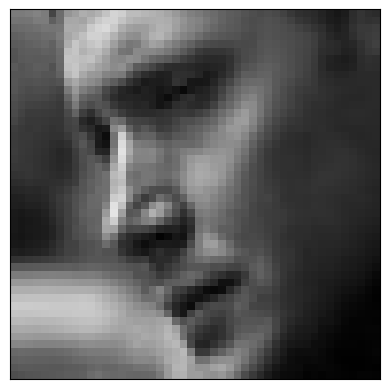

In [189]:
# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [190]:
 #Resize it to 32x32 pixels
image = cv2.resize(image, (32,32))

# Normalize the image
image = (image-mean)/(std+1e-7)

# Add an extra dimension because the model expects a batch of images
image = image.reshape((1, 32, 32, 3))

In [193]:
prediction = model.predict(image)


AttributeError: 'NoneType' object has no attribute 'shape'